In [ ]:
import pandas as pd
import numpy as np
!gdown 13-uuPWybV24ngfL1gKfztoGLNhXxjjrg

data = pd.read_csv('./HRDataset_v1.csv')
# creating a new DataFrame, keeping the original data
df = pd.DataFrame(data.copy())
df.head()

Downloading...
From: https://drive.google.com/uc?id=13-uuPWybV24ngfL1gKfztoGLNhXxjjrg
To: /content/HRDataset_v1.csv
100% 76.9k/76.9k [00:00<00:00, 60.9MB/s]


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [ ]:
# Dataset Description - Exploring the dataset
# We're starting to gain some insights about the data especially the data types of the columns
print(f"Shape of dataset: {df.shape}")
print("Columns in the dataset:")
print(df.info())

Shape of dataset: (311, 36)
Columns in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null

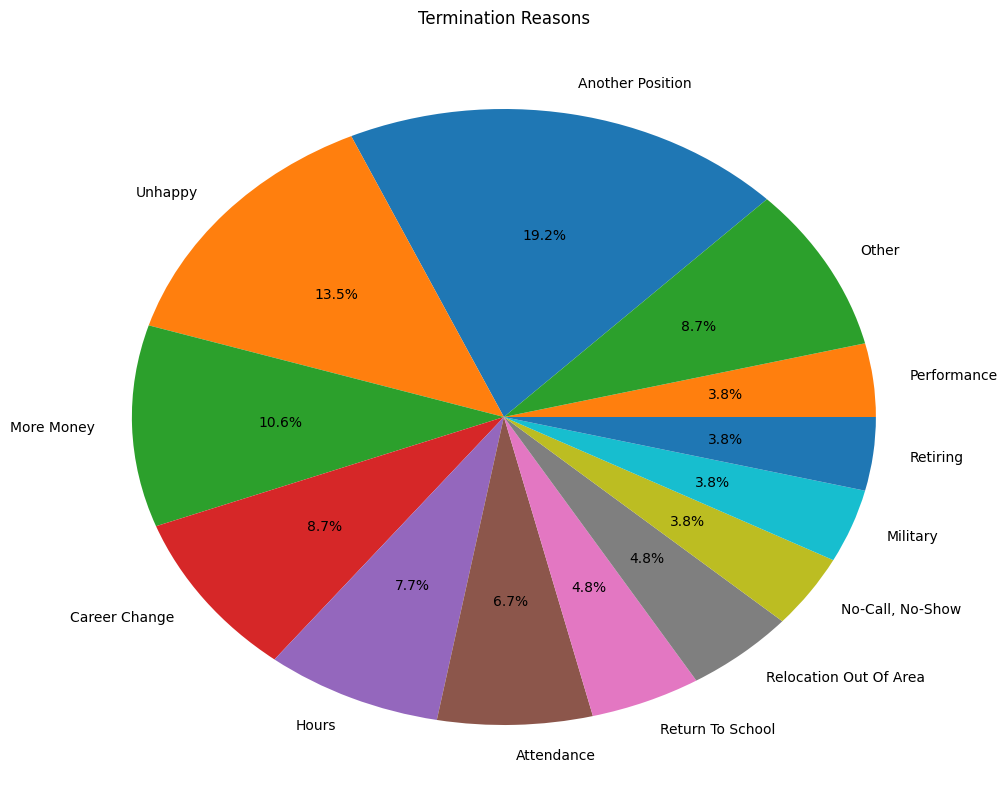

In [ ]:
# ---- Visualizations ----

# Now, we familiarize the readers with the dataset through some informative statistics and charts.
import matplotlib.pyplot as plt
import seaborn as sns

# Turnover reasons distribution

# excluding "Still Employed" from the TermReason column for clearer visualization
# they're already working why show?
turnover_reasons = df['TermReason'].value_counts()
turnover_reasons = turnover_reasons[turnover_reasons.index != 'N/A-StillEmployed']

total = turnover_reasons.sum()
percentages = (turnover_reasons / total) * 100

# grouping categories with less than 3% into "Other" for better visualization
filtered_reasons = percentages[percentages >= 3]
filtered_reasons['Other'] = percentages[percentages < 3].sum()

filtered_reasons.index = filtered_reasons.index.str.title()

plt.figure(figsize=(12, 10))
ax = filtered_reasons.plot.pie(autopct='%1.1f%%', startangle=45,)
ax.set_aspect('auto')
plt.title('Termination Reasons')
plt.ylabel('')
plt.show()

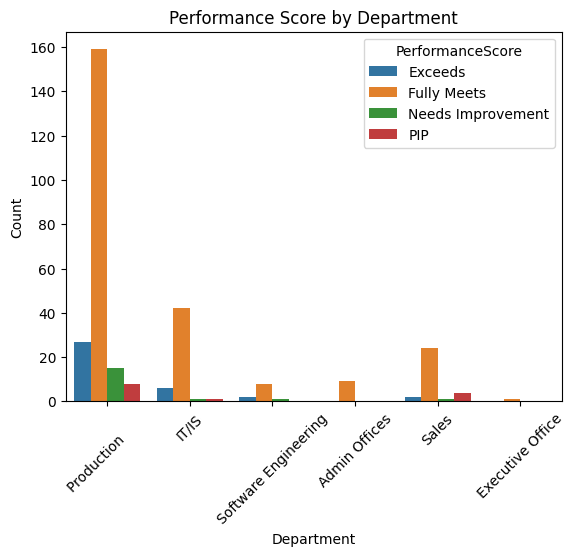

In [ ]:
# Performance by Departments visualization

sns.countplot(x='Department', hue='PerformanceScore', data=df)
plt.title('Performance Score by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

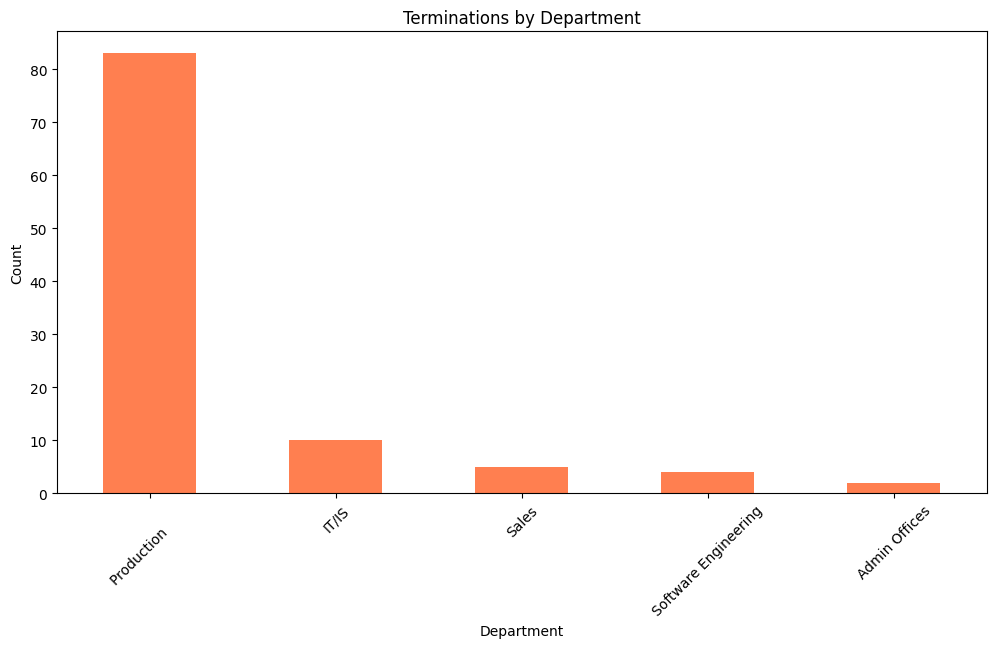

In [ ]:
# Termination counts by department
department_termination = df[df['Termd'] == 1]['Department'].value_counts()

plt.figure(figsize=(12, 6))
department_termination.plot(kind='bar', color='coral')
plt.title('Terminations by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

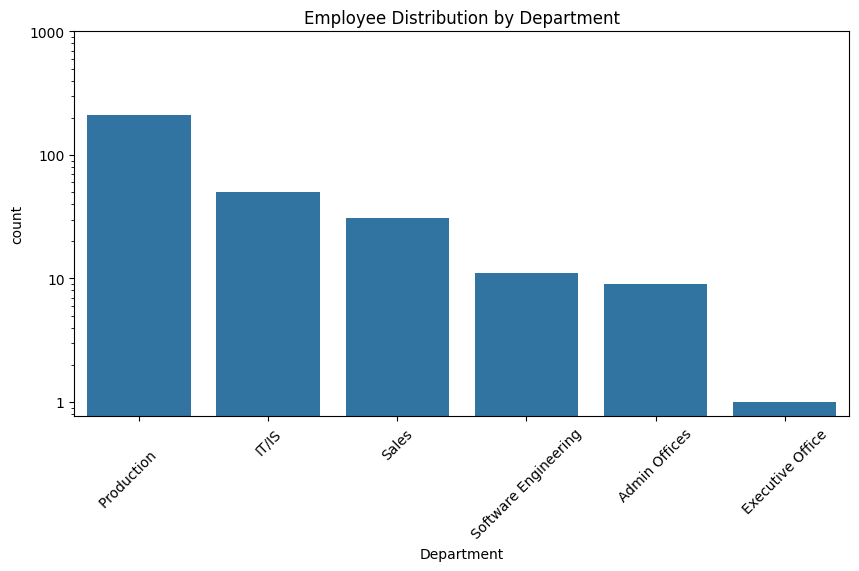

In [ ]:
# Employee distribution by department
plt.figure(figsize=(10, 5))
sns.countplot(x='Department', data=df, order=df['Department'].value_counts().index)
plt.yscale('log') # Thanks to logarithmic scale, we can see the distribution of employees clearer even in the departments with fewer employees
log_ticks = [1, 10, 100, 1000]
plt.yticks(log_ticks, [str(tick) for tick in log_ticks])  # Showing count values as integers

plt.title('Employee Distribution by Department')
plt.xticks(rotation=45)
plt.show()

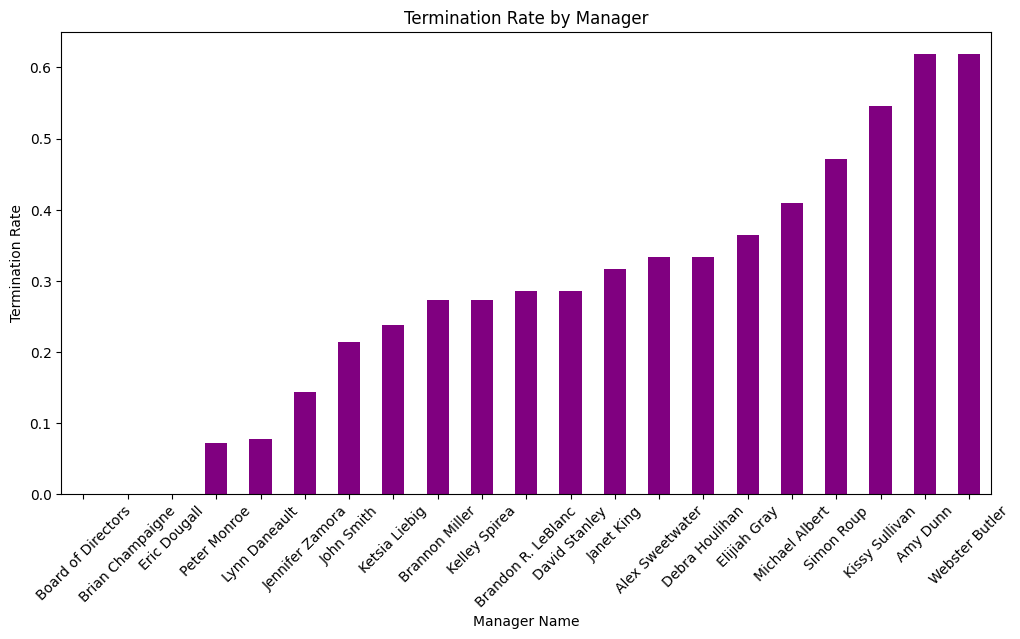

In [ ]:
# Termination rate by manager

manager_termination_rate = df.groupby('ManagerName')['Termd'].mean().sort_values()

plt.figure(figsize=(12, 6))
manager_termination_rate.plot(kind='bar', color='purple')
plt.title('Termination Rate by Manager')
plt.xlabel('Manager Name')
plt.ylabel('Termination Rate')
plt.xticks(rotation=45)
plt.show()


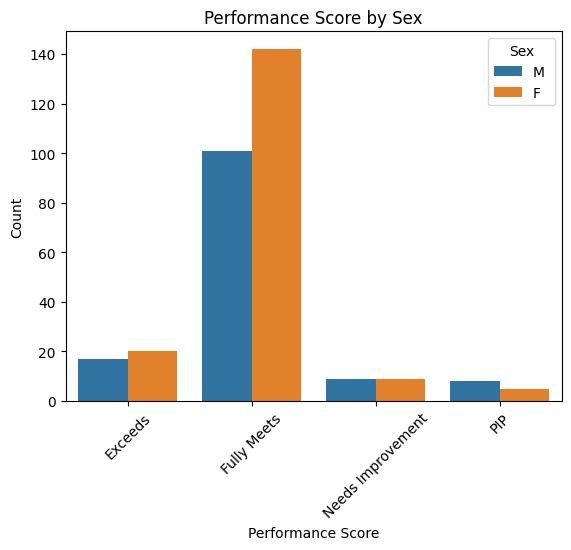

In [ ]:
# Performance Score by Sex Visualization
sns.countplot(x='PerformanceScore', hue='Sex', data=df)
plt.title('Performance Score by Sex')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

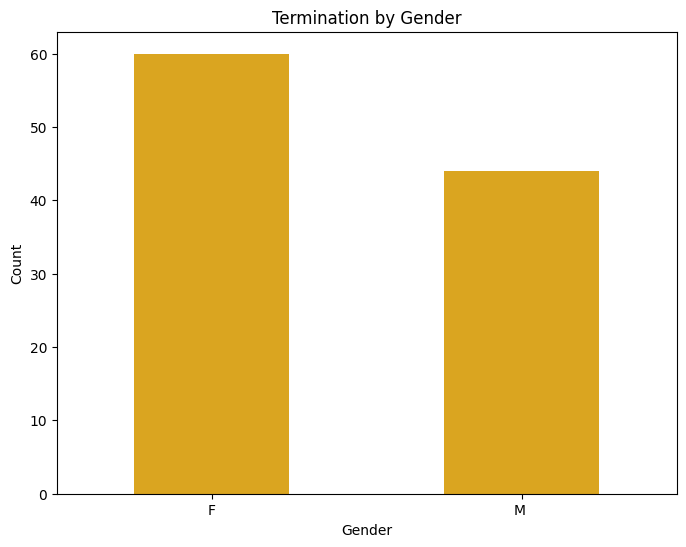

In [ ]:
# Termination count by gender
gender_termination = df[df['Termd'] == 1]['Sex'].value_counts()

plt.figure(figsize=(8, 6))
gender_termination.plot(kind='bar', color='goldenrod')
plt.title('Termination by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


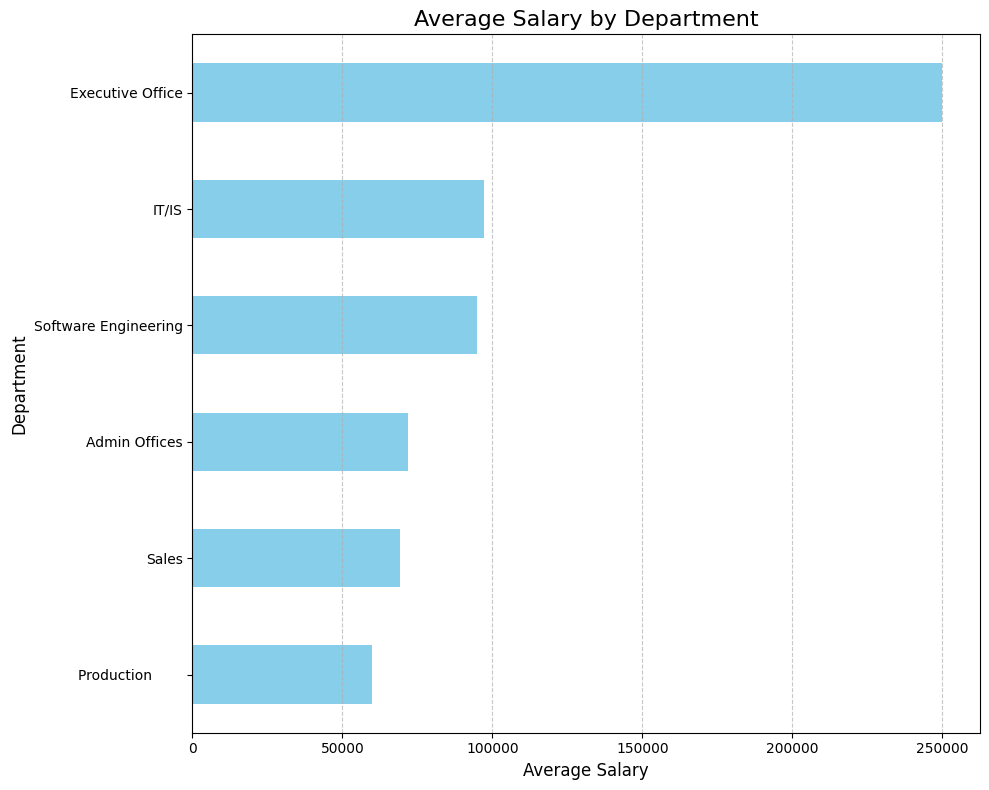

In [ ]:
# Grouping by Department and calculating average salary
avg_salary_by_department = df.groupby('Department')['Salary'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
avg_salary_by_department.plot(kind='barh', color='skyblue')
plt.title('Average Salary by Department', fontsize=16)
plt.xlabel('Average Salary', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Data Preprocessing
# -----------------------------------
# Data Cleaning
# -----------------------------------
import datetime

# We're checking for missing values before cleaning process
print("Missing values per column before cleaning:")
print(df.isnull().sum())

# Creating a 'Tenure' column to give that input to features list.
# but since there are some employees who don't have date of termination value we have to exclude them.
# This tenure column will give us insight.
current_date = datetime.datetime.now()
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], errors='coerce')
df['TenureInYears'] = df.apply(
    lambda row: (row['DateofTermination'] - row['DateofHire']).days // 365 if pd.notna(row['DateofTermination'])
    else round((current_date - row['DateofHire']).days // 365),
    axis=1
)

# Dropping irrelevant ID-related columns
# There are a plenty of ID columns that dont have any meaningful contribution to our model and the prediction.
# Some of them are MarriedID, MarialStatusID, DeptID and so on and so forth. Here we're dropping them.
id_columns = [col for col in df.columns if col.endswith('ID')]

# Also there's a column named 'Hispanic Latino' which includes boolean 'Yes' and 'No' values. We believe that this column also should be dropped since it doesnt actually provide insight for model.
hispanic_latino = ['HispanicLatino']
columns_to_drop = id_columns + hispanic_latino

df_prod = df.drop(columns=columns_to_drop)

# Displaying remaining columns
print("Remaining columns after dropping ID-related columns:")
print(len(df_prod.columns))

Missing values per column before cleaning:
Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
Recru

In [ ]:
# We see a large number of missing values in 'DateofTermination' column due to employees who are still employed
df_prod['DateofTermination'] = df_prod['DateofTermination'].fillna(0)

# Verify if missing values are handled correctly
print("Missing values per column after filling DateofTermination with 0:")
print(df_prod.isnull().sum())

Missing values per column after filling DateofTermination with 0:
Employee_Name                 0
Salary                        0
Termd                         0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatisfaction               0
SpecialProjectsCount          0
LastPerformanceReview_Date    0
DaysLateLast30                0
Absences                      0
TenureInYears                 0
dtype: int64


In [ ]:
# --- Data Transformation ---
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# For ordinal data label encoding
# to avoid ranking problems if also make them with
# ORDER SHOULD MATTER
ordinal_feature_columns = ['PerformanceScore']

# For nominal datas we'll use one-hot encoding. Because,
# List of categorical columns
# ORDER SHOULDNT MATTER
nominal_feature_columns = ['Department', 'Position', 'ManagerName', 'Sex', 'CitizenDesc', 'RaceDesc']

label_encoders = {}
label_encoders = {}
for col in ordinal_feature_columns:
    le = LabelEncoder()
    df_prod[col] = le.fit_transform(df_prod[col])
    label_encoders[col] = le  # Store encoder for inverse transformations if needed later

# One-Hot Encoding for nominal columns
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fitting and transforming the categorical columns
encoded_data = encoder.fit_transform(df_prod[nominal_feature_columns])

# Creating a DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(nominal_feature_columns))

# Concatenate the one-hot encoded columns back to the original dataframe
df_prod = pd.concat([df_prod, encoded_df], axis=1)

# Drop the original nominal columns after encoding
df_prod.drop(columns=nominal_feature_columns, inplace=True)

# Display the final dataset
print(df_prod.head())

              Employee_Name  Salary  Termd State   Zip       DOB MaritalDesc  \
0       Adinolfi, Wilson  K   62506      0    MA  1960  07/10/83      Single   
1  Ait Sidi, Karthikeyan     104437      1    MA  2148  05/05/75     Married   
2         Akinkuolie, Sarah   64955      1    MA  1810  09/19/88     Married   
3              Alagbe,Trina   64991      0    MA  1886  09/27/88     Married   
4          Anderson, Carol    50825      1    MA  2169  09/08/89    Divorced   

  DateofHire    DateofTermination         TermReason  ... Sex_M   \
0 2011-07-05                    0  N/A-StillEmployed  ...    1.0   
1 2015-03-30  2016-06-16 00:00:00      career change  ...    1.0   
2 2011-07-05  2012-09-24 00:00:00              hours  ...    0.0   
3 2008-01-07                    0  N/A-StillEmployed  ...    0.0   
4 2011-07-11  2016-09-06 00:00:00   return to school  ...    0.0   

  CitizenDesc_Eligible NonCitizen  CitizenDesc_Non-Citizen  \
0                             0.0               

In [ ]:
df_prod.head()

,Employee_Name,Salary,Termd,State,Zip,DOB,MaritalDesc,DateofHire,DateofTermination,TermReason,...,Sex_M,CitizenDesc_Eligible NonCitizen,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_American Indian or Alaska Native,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White
0,"Adinolfi, Wilson K",62506,0,MA,1960,07/10/83,Single,2011-07-05,0,N/A-StillEmployed,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,"Ait Sidi, Karthikeyan",104437,1,MA,2148,05/05/75,Married,2015-03-30,2016-06-16 00:00:00,career change,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,"Akinkuolie, Sarah",64955,1,MA,1810,09/19/88,Married,2011-07-05,2012-09-24 00:00:00,hours,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,"Alagbe,Trina",64991,0,MA,1886,09/27/88,Married,2008-01-07,0,N/A-StillEmployed,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,"Anderson, Carol",50825,1,MA,2169,09/08/89,Divorced,2011-07-11,2016-09-06 00:00:00,return to school,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# --- Data Reduction / Feature Engineering ---
# After cleaning and transforming the data as a last step we'll do data reduction before we move on with ML inference section.
from sklearn.model_selection import train_test_split, cross_val_score

# Our target variable is 'Termd' since our main goal is to predict employee retention. And it's indicating whether the employee left or not.
target = 'Termd'

# Creating additional features out of our dataset which we believe can be really effective in the process of predicting the employee retention.
df_prod['Age'] = (pd.Timestamp.now() - pd.to_datetime(df['DOB'])).dt.days / 365.25

# Termination reason and Termination type features should not be used for training the model because these features are results. They're not predictors.
# Define the feature list dynamically based on one-hot encoded columns
# In base_features list we only included the non-categorical columns since earlier we one-hot encoded some categorical variables and will include them later.
base_features = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'PerformanceScore', 'Age', 'TenureInYears']

# since one-hot encoded features start with ColumnName_<CategoryName1>, ColumnName_<CategoryName2>
# This kind of filtering logic makes sense.
onehot_features = [col for col in df_prod.columns if any(col.startswith(nom) for nom in nominal_feature_columns)]
features = base_features + onehot_features

print(features)

# Splitting features and target
X = df_prod[features]
y = df_prod[target]

# Splitting the dataset into training, validation, and testing sets.
# In this way we can detect possible overfitting, underfitting situations.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'PerformanceScore', 'Age', 'TenureInYears', 'Department_Admin Offices', 'Department_Executive Office', 'Department_IT/IS', 'Department_Production       ', 'Department_Sales', 'Department_Software Engineering', 'Position_Accountant I', 'Position_Administrative Assistant', 'Position_Area Sales Manager', 'Position_BI Developer', 'Position_BI Director', 'Position_CIO', 'Position_Data Analyst', 'Position_Data Analyst ', 'Position_Data Architect', 'Position_Database Administrator', 'Position_Director of Operations', 'Position_Director of Sales', 'Position_Enterprise Architect', 'Position_IT Director', 'Position_IT Manager - DB', 'Position_IT Manager - Infra', 'Position_IT Manager - Support', 'Position_IT Support', 'Position_Network Engineer', 'Position_President & CEO', 'Position_Principal Data Architect', 'Position_Production Manager', 'Position_Production Technician I', 'Position_Production Technician II', 'Position_Sales Manager', 'Positio

<ipython-input-38-0ef7bb773263>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_prod['Age'] = (pd.Timestamp.now() - pd.to_datetime(df['DOB'])).dt.days / 365.25


In [ ]:
print(f"Total features: {X.shape[1]}")
print(f"Total samples: {X.shape[0]}")

# If you want to display sizes of the training, validation, and testing sets:
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Testing set: {X_test.shape}")

Total features: 76
Total samples: 311
Training set: (186, 76)
Validation set: (62, 76)
Testing set: (63, 76)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardizing the cleaned features (fit on training set, apply to all sets)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X.loc[X_train.index])
X_val_scaled = scaler.transform(X.loc[X_val.index])
X_test_scaled = scaler.transform(X.loc[X_test.index])

# Applying PCA (fit on training set, apply to all sets)
pca = PCA(n_components=0.90)  # Retain 90% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Explained variance ratio to understand how much variance is retained
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")
print(f"Number of components selected: {pca.n_components_}")

# Transform the PCA result back into a DataFrame for better interpretability
import pandas as pd
pca_columns = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
X_val_pca_df = pd.DataFrame(X_val_pca, columns=pca_columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

# Display transformed training set
print(X_train_pca_df.head())

Explained variance ratio: [0.07175545 0.05263562 0.05098875 0.04972863 0.04934718 0.03908349
 0.03725181 0.03615035 0.03406273 0.03364283 0.0327637  0.02890926
 0.02694791 0.02513905 0.02268338 0.0220588  0.02133555 0.02085862
 0.01857001 0.01843872 0.01776149 0.01731752 0.01667136 0.01657066
 0.01621735 0.01613122 0.01594112 0.0158011  0.01568044 0.01556531
 0.01504664 0.01477995 0.01449991]
Number of components selected: 33
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -3.085274  0.093143 -2.870390 -1.302923 -2.474663  1.711846  0.946017   
1  1.318671  0.640011  0.308267  0.121228 -0.092698 -0.464697 -0.396217   
2  0.960494  0.311672 -0.295694 -0.283629 -0.192133 -0.010453  1.097874   
3 -0.009760  0.445766  0.412886  0.417784  0.960916 -0.065889  0.421611   
4  1.449873  0.183725 -0.142136 -0.769601 -0.175641  0.460763  0.916536   

        PC8       PC9      PC10  ...      PC24      PC25      PC26      PC27  \
0 -1.966628 -3.387716 -0.804755  ...  0

In [ ]:
# ---- MACHINE LEARNING IN ACTION ----

# ---- Neural Network -----
# As the first model we'll start with training the NN.
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# Build the neural network model with sigmoid activation in hidden layers
def build_nn():
    model = Sequential([
        Dense(64, activation="relu", input_shape=(X_train_pca.shape[1],)),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")  # Binary classification
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Train NN Model
nn_model = build_nn()
nn_model.fit(X_train_pca, y_train, epochs=20, batch_size=32, validation_data=(X_val_pca, y_val), verbose=1)

# Evaluate NN Model
nn_loss, nn_acc = nn_model.evaluate(X_test_pca, y_test)
print(f"NN Test Accuracy: {nn_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.4655 - loss: 0.7151 - val_accuracy: 0.5968 - val_loss: 0.6663
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5829 - loss: 0.6167 - val_accuracy: 0.7258 - val_loss: 0.6167
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6430 - loss: 0.5738 - val_accuracy: 0.7581 - val_loss: 0.5911
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6897 - loss: 0.5653 - val_accuracy: 0.7419 - val_loss: 0.5714
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7429 - loss: 0.5057 - val_accuracy: 0.7742 - val_loss: 0.5541
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7883 - loss: 0.4925 - val_accuracy: 0.7742 - val_loss: 0.5390
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8111 - loss: 0.4724 - val_accuracy: 0.7581 - val_loss: 0.5244
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8287 - loss: 0.4561 - val_accuracy: 0.7903 - val_loss: 0.5106


In [ ]:
# ---- XgBoost ----
#
import xgboost as xgb

# Train XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100, max_depth=6, learning_rate=0.1)
xgb_model.fit(X_train_pca, y_train)

# Evaluate XGBoost
xgb_test_preds = xgb_model.predict(X_test_pca)
xgb_accuracy = accuracy_score(y_test, xgb_test_preds)
print(f"XGBoost Test Accuracy: {xgb_accuracy:.4f}")

XGBoost Test Accuracy: 0.8413


Decision Tree Test Accuracy: 0.7778


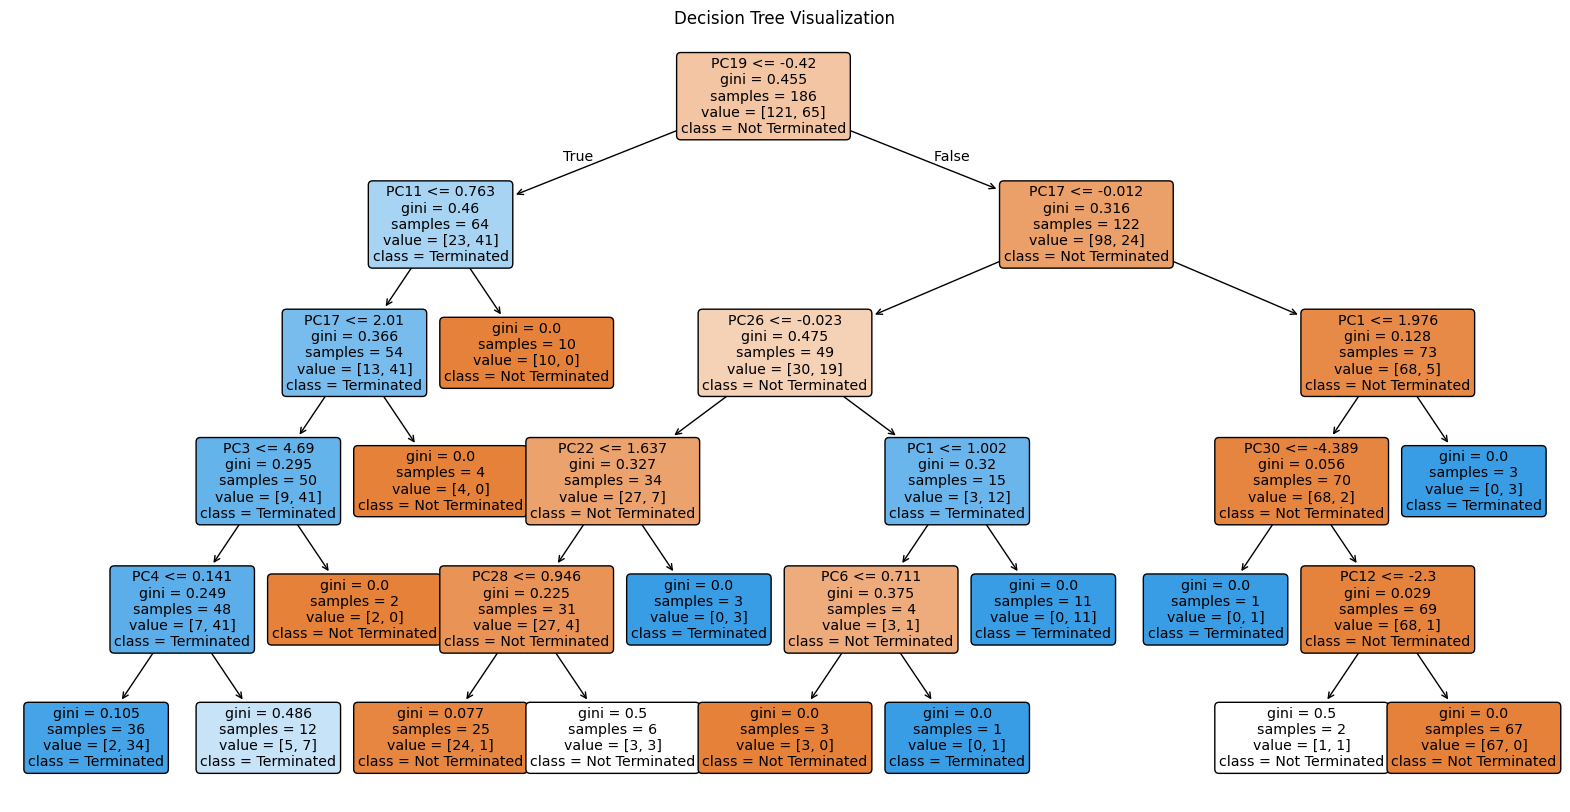

In [ ]:
# ---- Decision Tree ----
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,  # TODO
    criterion="gini"
)
dt_model.fit(X_train_pca, y_train)

# Evaluate the model
dt_test_preds = dt_model.predict(X_test_pca)
dt_accuracy = accuracy_score(y_test, dt_test_preds)
print(f"Decision Tree Test Accuracy: {dt_accuracy:.4f}")

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=pca_columns,  # Feature names from PCA
    class_names=["Not Terminated", "Terminated"],  # Adjust based on target classes
    filled=True,
    rounded=True
)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# --------- Hyperparameter Tuning with RayTune ----------

# ---- Neural Network HT -----
from ray import tune, train
from ray.tune.integration.keras import TuneReportCallback
import ray
from ray.tune.schedulers import AsyncHyperBandScheduler

# NN Training Function for Ray Tune
def train_nn_tune(config):
    try:
        model = Sequential([
            Dense(config["layer1_units"], activation="relu", input_shape=(X_train_pca.shape[1],)),
            Dense(config["layer2_units"], activation="relu"),
            Dense(1, activation="sigmoid")
        ])

        model.compile(
            optimizer=Adam(learning_rate=config["lr"]),
            loss="binary_crossentropy",
            metrics=["accuracy"]
        )

        # Using TuneReportCallback with proper metric name
        callback = TuneReportCallback({
            "val_accuracy": "val_accuracy",
            "loss": "loss"
        })

        history = model.fit(
            X_train_pca, y_train,
            validation_data=(X_val_pca, y_val),
            epochs=20,
            batch_size=config["batch_size"],
            verbose=0,
            callbacks=[callback]
        )

    except Exception as e:
        print(f"Error during training: {e}")
        raise e

# NN Search Space
nn_search_space = {
    "layer1_units": tune.choice([32, 64, 128]),
    "layer2_units": tune.choice([16, 32, 64]),
    "lr": tune.loguniform(1e-4, 1e-2),
    "batch_size": tune.choice([16, 32]),
}

# Run NN Tuning
tune.run(
    train_nn_tune,
    config=nn_search_space,
    num_samples=10,
    stop={"training_iteration": 10},
    metric="val_accuracy",  # Metric to optimize (make sure it matches what's reported)
    mode="max",            # Mode of optimization (maximize val_accuracy)
    resources_per_trial={"cpu": 2, "gpu": 0},  # Specify resources for each trial (adjust as needed)
    scheduler=tune.schedulers.AsyncHyperBandScheduler()
)

In [ ]:
# ---- Decision Tree HyperParameter Tuning ----
def train_dt_tune(config):
    model = DecisionTreeClassifier(max_depth=config["max_depth"], min_samples_split=config["min_samples_split"], random_state=42)
    model.fit(X_train_pca, y_train)
    val_preds = model.predict(X_val_pca)
    val_accuracy = accuracy_score(y_val, val_preds)
    tune.report(val_accuracy=val_accuracy)

# DT Search Space
dt_search_space = {
    "max_depth": tune.choice([5, 10, 15, 20]),
    "min_samples_split": tune.choice([2, 5, 10]),
}

# Run DT Tuning
tune.run(train_dt_tune, config=dt_search_space, num_samples=20, metric="val_accuracy", mode="max")

In [ ]:
# ---- XGBoost Hyperparameter Tuning ----
def train_xgb_tune(config):
    model = xgb.XGBClassifier(
        n_estimators=config["n_estimators"],
        max_depth=config["max_depth"],
        learning_rate=config["lr"],
        random_state=42
    )
    model.fit(X_train_pca, y_train)
    val_preds = model.predict(X_val_pca)
    val_accuracy = accuracy_score(y_val, val_preds)
    tune.report(val_accuracy=val_accuracy)

# XGBoost Search Space
xgb_search_space = {
    "n_estimators": tune.choice([50, 100, 150]),
    "max_depth": tune.choice([3, 6, 9]),
    "lr": tune.loguniform(0.01, 0.2),
}

# Run XGB Tuning
tune.run(train_xgb_tune, config=xgb_search_space, num_samples=20, metric="val_accuracy", mode="max")

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif
import matplotlib.pyplot as plt

# Using SelectKBest with f_classif (ANOVA F-value)
selector_f_classif = SelectKBest(f_classif, k='all')
X_train_f_classif = selector_f_classif.fit_transform(X_train_pca, y_train)
f_classif_scores = selector_f_classif.scores_

# Plotting feature importances (F-classif)
plt.figure(figsize=(10, 6))
plt.barh(range(len(f_classif_scores)), f_classif_scores)
plt.yticks(range(len(f_classif_scores)), pca_columns)
plt.xlabel("F-Value (ANOVA)")
plt.title("Feature Importance (ANOVA F-Value)")
plt.show()

# Using SelectKBest with chi2 (Chi-squared test)
# Chi-squared test requires positive features, so we need to ensure no negative values
X_train_chi2 = X_train_pca.copy()
X_train_chi2[X_train_chi2 < 0] = 0  # Replace negative values with 0

selector_chi2 = SelectKBest(chi2, k='all')
X_train_chi2_selected = selector_chi2.fit_transform(X_train_chi2, y_train)
chi2_scores = selector_chi2.scores_

# Plotting feature importances (Chi-squared)
plt.figure(figsize=(10, 6))
plt.barh(range(len(chi2_scores)), chi2_scores)
plt.yticks(range(len(chi2_scores)), pca_columns)
plt.xlabel("Chi-Squared Score")
plt.title("Feature Importance (Chi-Squared Test)")
plt.show()

# Using SelectKBest with mutual_info_classif (Mutual Information)
selector_mutual_info = SelectKBest(mutual_info_classif, k='all')
X_train_mutual_info = selector_mutual_info.fit_transform(X_train_pca, y_train)
mutual_info_scores = selector_mutual_info.scores_

# Plotting feature importances (Mutual Information)
plt.figure(figsize=(10, 6))
plt.barh(range(len(mutual_info_scores)), mutual_info_scores)
plt.yticks(range(len(mutual_info_scores)), pca_columns)
plt.xlabel("Mutual Information Score")
plt.title("Feature Importance (Mutual Information)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Get PCA loadings (coefficients)
pca_loadings = pca.components_.T  # Shape: (n_features, n_components)
loadings_df = pd.DataFrame(pca_loadings, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])], index=X_train.columns)

# Display the loadings for each principal component
print(loadings_df.head())

# Visualize the loadings for each principal component
import matplotlib.pyplot as plt

# Plot the first few principal components loadings for the first 10 features
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# PC1 Loadings
axes[0].barh(loadings_df.index[:10], loadings_df['PC1'][:10])
axes[0].set_title('Top 10 Features for PC1')
axes[0].set_xlabel('Loading value')

# PC2 Loadings
axes[1].barh(loadings_df.index[:10], loadings_df['PC2'][:10])
axes[1].set_title('Top 10 Features for PC2')
axes[1].set_xlabel('Loading value')

plt.tight_layout()
plt.show()

# Now, print top features that contribute to each PC (sorted by absolute value of loading)
for pc in range(pca_loadings.shape[1]):
    sorted_features = loadings_df.iloc[:, pc].abs().sort_values(ascending=False).head(10)
    print(f"Top 10 features contributing to PC{pc+1}:")
    print(sorted_features)
    print()


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

# Define a function to evaluate the models
def evaluate_model(y_test, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision
    precision = precision_score(y_test, y_pred)

    # Recall
    recall = recall_score(y_test, y_pred)

    # F1-Score
    f1 = f1_score(y_test, y_pred)

    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_pred)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Classification Report
    class_report = classification_report(y_test, y_pred)

    # Print the performance metrics
    print("Performance Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

    return accuracy, precision, recall, f1, roc_auc, conf_matrix, class_report

# Assuming models is a dictionary with trained models
models = {
    'Decision Tree': dt_model,
    'XGBoost': xgb_model,
    'Neural Network': nn_model,
}

# Dictionary to store results for each model
results = {}

# Iterate over all models to make predictions and evaluate performance
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")

    # Predict on the test data
    y_pred = model.predict(X_test_pca)

    if model_name == 'Neural Network':
        # Convert probabilities to binary predictions (0 or 1)
        y_pred = (y_pred > 0.5).astype(int)

    # Evaluate the model
    metrics = evaluate_model(y_test, y_pred)

    # Store the results in a dictionary
    results[model_name] = metrics

# Optionally, display results for all models
print("\nSummary of All Models:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Accuracy: {metrics[0]:.4f}, Precision: {metrics[1]:.4f}, Recall: {metrics[2]:.4f}, F1-Score: {metrics[3]:.4f}, ROC AUC: {metrics[4]:.4f}")
    print("\nConfusion Matrix:")
    print(metrics[5])
    print("\nClassification Report:")
    print(metrics[6])


Evaluating Decision Tree...
Performance Metrics:
Accuracy: 0.7778
Precision: 0.7368
Recall: 0.6087
F1-Score: 0.6667
ROC AUC: 0.7418

Confusion Matrix:
[[35  5]
 [ 9 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.83        40
           1       0.74      0.61      0.67        23

    accuracy                           0.78        63
   macro avg       0.77      0.74      0.75        63
weighted avg       0.77      0.78      0.77        63

Evaluating XGBoost...
Performance Metrics:
Accuracy: 0.8413
Precision: 0.8421
Recall: 0.6957
F1-Score: 0.7619
ROC AUC: 0.8103

Confusion Matrix:
[[37  3]
 [ 7 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        40
           1       0.84      0.70      0.76        23

    accuracy                           0.84        63
   macro avg       0.84      0.81      0.82        63
weighted avg       

In [ ]:
# 4.4. Results
#Share the key results without discussing them . This section should be based on facts.

In [ ]:
# 5. Insights
# -----------
# Insights derived from the results
# like some of these gpt generated typeshit responses:
# - The neural network showed competitive performance, with slight overfitting.
# - The confusion matrix highlights potential issues with false positives.